In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [2]:
df = pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [4]:
df.isna().any().any()

False

In [5]:
helper = df['Attrition']
df.drop(['Attrition'], axis=1, inplace=True)
df['Attrition'] = helper
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,80,1,17,3,3,5,2,0,3,No
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,80,1,9,5,3,7,7,1,7,No
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,80,1,6,0,3,6,2,0,3,No
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,80,0,17,3,2,9,6,0,8,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [7]:
from sklearn.preprocessing import LabelEncoder

#Auto encodes any dataframe column of type category or object.
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df

df = dummyEncode(df)
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2,1102,2,1,2,1,1,1,2,...,80,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,1,2,3,...,80,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,1,4,4,...,80,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,1,5,4,...,80,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,1,7,1,...,80,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,1,2061,3,...,80,1,17,3,3,5,2,0,3,0
1466,39,2,613,1,6,1,3,1,2062,4,...,80,1,9,5,3,7,7,1,7,0
1467,27,2,155,1,4,3,1,1,2064,2,...,80,1,6,0,3,6,2,0,3,0
1468,49,1,1023,2,2,3,3,1,2065,4,...,80,0,17,3,2,9,6,0,8,0


In [8]:
values = df.values
 
X = values[:,0:34]
Y = values[:,-1]
X

array([[  41,    2, 1102, ...,    4,    0,    5],
       [  49,    1,  279, ...,    7,    1,    7],
       [  37,    2, 1373, ...,    0,    0,    0],
       ...,
       [  27,    2,  155, ...,    2,    0,    3],
       [  49,    1, 1023, ...,    6,    0,    8],
       [  34,    2,  628, ...,    3,    1,    2]])

In [9]:
from sklearn import preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import tensorflow as tf

le = LabelEncoder()
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)
X

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.446350,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,0.0,-1.701283,-0.660531,...,-1.584178,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,0.0,-1.699621,0.254625,...,1.191438,0.0,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,0.0,-1.696298,1.169781,...,-0.658973,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.937414,0.0,-1.694636,1.169781,...,0.266233,0.0,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.565311,0.0,-1.691313,-1.575686,...,1.191438,0.0,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,-0.913194,0.202082,-0.493817,1.703764,-0.891688,0.565311,0.0,1.721670,0.254625,...,0.266233,0.0,0.241988,0.735447,0.155707,0.338096,-0.327893,-0.615492,-0.679146,-0.314873
1466,0.227347,0.590048,-0.469754,-0.493817,-0.393938,-1.868426,0.565311,0.0,1.723332,1.169781,...,-1.584178,0.0,0.241988,-0.293077,1.707500,0.338096,-0.001333,0.764998,-0.368715,0.806541
1467,-1.086676,0.590048,-1.605183,-0.493817,-0.640727,0.085049,-0.937414,0.0,1.726655,-0.660531,...,-0.658973,0.0,0.241988,-0.678774,-2.171982,0.338096,-0.164613,-0.615492,-0.679146,-0.314873
1468,1.322365,-0.913194,0.546677,1.401512,-0.887515,0.085049,0.565311,0.0,1.728317,1.169781,...,1.191438,0.0,-0.932014,0.735447,0.155707,-1.077862,0.325228,0.488900,-0.679146,1.086895


In [10]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
plt.style.use('ggplot')
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

outcome = []
model_names = []
models = [('LogReg', LogisticRegression()), 
          ('SVM', SVC()), 
          ('DecTree', DecisionTreeClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('LinDisc', LinearDiscriminantAnalysis()),
          ('GaussianNB', GaussianNB()),
          ('RanForest', RandomForestClassifier())]

In [11]:
for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=10, random_state=42)
    results = model_selection.cross_val_score(model, X, Y, cv=k_fold_validation, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)

LogReg| Mean=0.866667 STD=0.027245
SVM| Mean=0.859864 STD=0.025124
DecTree| Mean=0.783673 STD=0.025234
KNN| Mean=0.844898 STD=0.022726
LinDisc| Mean=0.863265 STD=0.022858
GaussianNB| Mean=0.780272 STD=0.036640
RanForest| Mean=0.854422 STD=0.020901


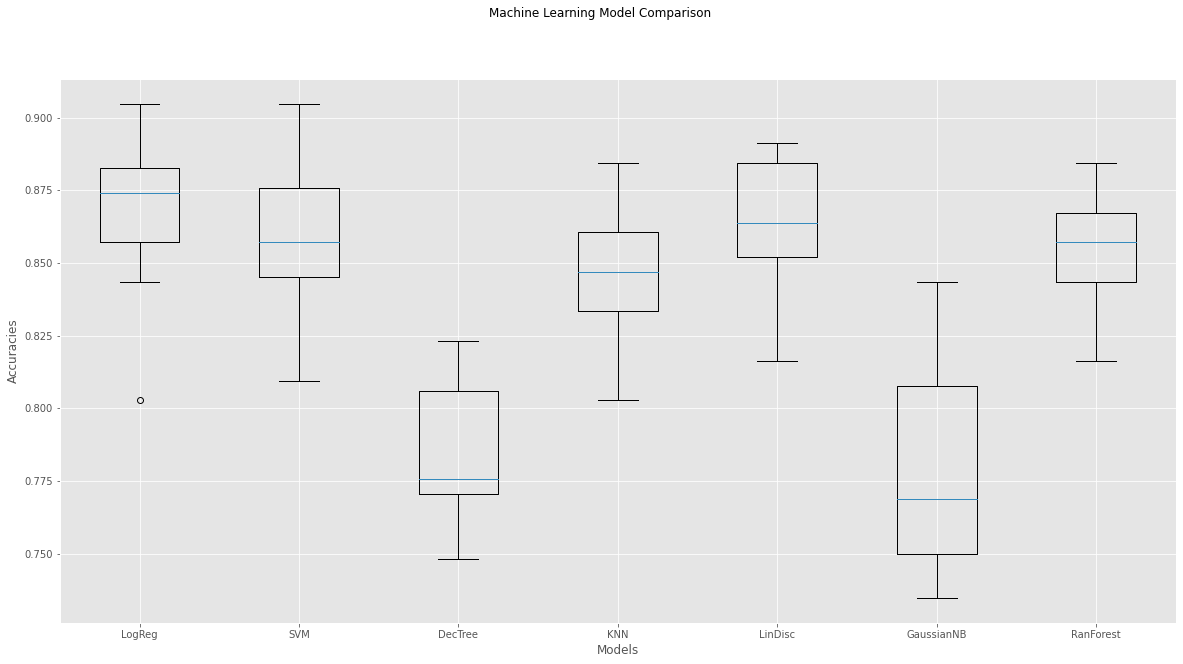

In [12]:
fig = plt.figure()
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome)
plt.xlabel('Models')
plt.ylabel('Accuracies')
ax.set_xticklabels(model_names)
plt.show()

In [13]:
import numpy as nump

uniqueValues, occurCount = nump.unique(Y, return_counts=True)
 
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

Unique Values :  [0 1]
Occurrence Count :  [1233  237]


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [15]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_custom_model(input_dim, output_dim, nodes, n=1, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(n):
            model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='sigmoid'))

        # Compile model
        model.compile(loss='binary_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

models = [create_custom_model(34, 2, 34, i, 'neural_net_{}'.format(i)) 
          for i in range(1, 4)]

for create_model in models:
    create_model().summary()

Model: "neural_net_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 34)                1190      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 70        
Total params: 1,260
Trainable params: 1,260
Non-trainable params: 0
_________________________________________________________________
Model: "neural_net_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 34)                1190      
_________________________________________________________________
dense_3 (Dense)              (None, 34)                1190      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 70        
Total params: 2,450
Trainable 

In [16]:
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, 2)
Y_test = to_categorical(Y_test, 2)

In [17]:
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
warnings.simplefilter(action='ignore', category=FutureWarning)
history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,
                                 batch_size=21,
                                 epochs=50,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    import numpy as np
    pred=model.predict(X_test)
    pred_digits=np.argmax(pred,axis=1)
    y_train_ad = np.argmax(Y_train, axis=1)
    from sklearn.metrics import classification_report
    print(classification_report(Y_test, pred.round()))
    
    history_dict[model.name] = [history_callback, model]

Model name: neural_net_1
Test loss: 0.4342074692249298
Test accuracy: 0.8503401279449463
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       370
           1       0.54      0.31      0.39        71

   micro avg       0.85      0.85      0.85       441
   macro avg       0.71      0.63      0.65       441
weighted avg       0.82      0.85      0.83       441
 samples avg       0.84      0.85      0.84       441

Model name: neural_net_2
Test loss: 0.8038008809089661
Test accuracy: 0.8276643753051758
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       370
           1       0.46      0.35      0.40        71

   micro avg       0.83      0.83      0.83       441
   macro avg       0.67      0.63      0.65       441
weighted avg       0.81      0.83      0.82       441
 samples avg       0.82      0.83      0.82       441

Model name: neural_net_3
Test loss: 1.4376181364059448
Test 

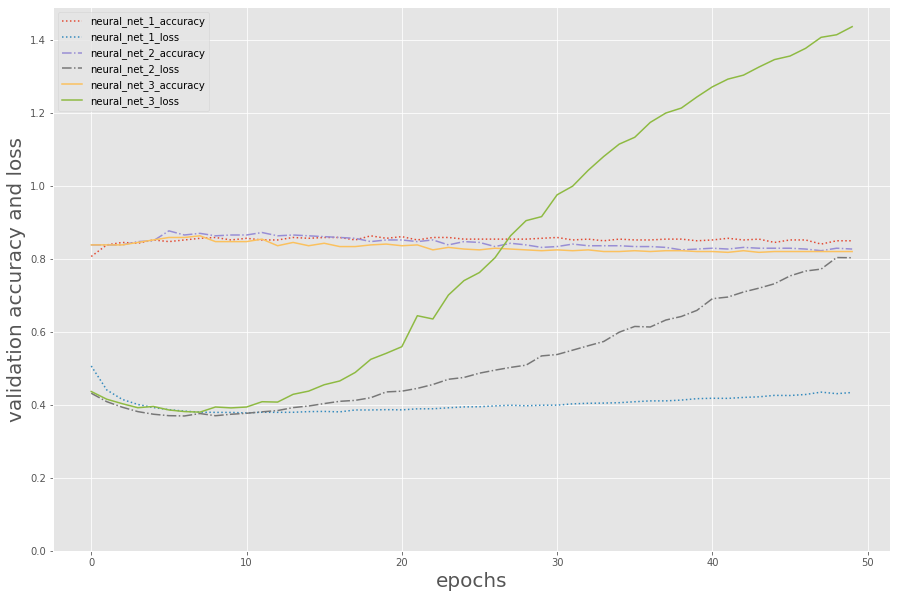

In [18]:
fig, (ax1) = plt.subplots(1, figsize=(15, 10))

for model_name in history_dict:
    val_acc = history_dict[model_name][0].history['val_accuracy']
    val_loss = history_dict[model_name][0].history['val_loss']
    if(model_name in "neural_net_1"):
        ax1.plot(val_acc, label="neural_net_1_accuracy", linestyle='dotted')
        ax1.plot(val_loss, label="neural_net_1_loss", linestyle='dotted')
    if(model_name in "neural_net_2"):
        ax1.plot(val_acc, label="neural_net_2_accuracy", linestyle='-.')
        ax1.plot(val_loss, label="neural_net_2_loss", linestyle='-.')
    if(model_name in "neural_net_3"):
        ax1.plot(val_acc, label="neural_net_3_accuracy", linestyle='solid')
        ax1.plot(val_loss, label="neural_net_3_loss", linestyle='solid')
    
ax1.set_ylabel('validation accuracy and loss', fontsize=20)
ax1.set_xlabel('epochs', fontsize=20)
ax1.legend()
ax1.set_ylim(ymin=0)
plt.show()

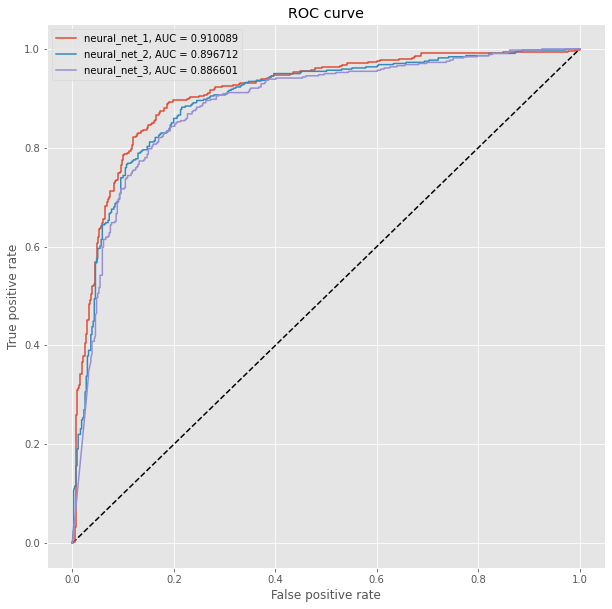

In [19]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

for model_name in history_dict:
    model = history_dict[model_name][1]
    
    Y_pred = model.predict(X_test)
    fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())
    
    plt.plot(fpr, tpr, label='{}, AUC = {:.6f}'.format(model_name, auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();

In [20]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

create_model = create_custom_model(34, 2, 34, 2)

estimator = KerasClassifier(build_fn=create_model, epochs=50, batch_size=21, verbose=0)
scores = cross_val_score(estimator, X_train, Y_train, cv=10)
print("Accuracy : {:0.2f} (+/- {:0.2f})".format(scores.mean(), scores.std()))

Accuracy : 0.84 (+/- 0.04)


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation;
import numpy
import tensorflow
tensorflow.keras.backend.set_floatx('float64')
numpy.random.seed(7)

model = Sequential()
model.add(Dense(34,activation='relu'))
model.add(Dense(34,activation='relu'))
model.add(Dense(2, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
ann = model.fit(X_train, Y_train, epochs=50, batch_size=21)
# evaluate the model
scores = model.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/50
49/49 [==============================] - 0s 2ms/step - loss: 0.5665 - accuracy: 0.7838
Epoch 2/50
49/49 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8525
Epoch 3/50
49/49 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.8350
Epoch 4/50
49/49 [==============================] - 0s 2ms/step - loss: 0.3591 - accuracy: 0.8475
Epoch 5/50
49/49 [==============================] - 0s 2ms/step - loss: 0.3397 - accuracy: 0.8585
Epoch 6/50
49/49 [==============================] - 0s 2ms/step - loss: 0.3303 - accuracy: 0.8618
Epoch 7/50
49/49 [==============================] - 0s 2ms/step - loss: 0.2961 - accuracy: 0.8847
Epoch 8/50
49/49 [==============================] - 0s 2ms/step - loss: 0.3117 - accuracy: 0.8766
Epoch 9/50
49/49 [==============================] - 0s 2ms/step - loss: 0.2869 - accuracy: 0.8858
Epoch 10/50
49/49 [==============================] - 0s 2ms/step - loss: 0.2501 - accuracy: 0.9025
Epoch 11/50
49/49 [

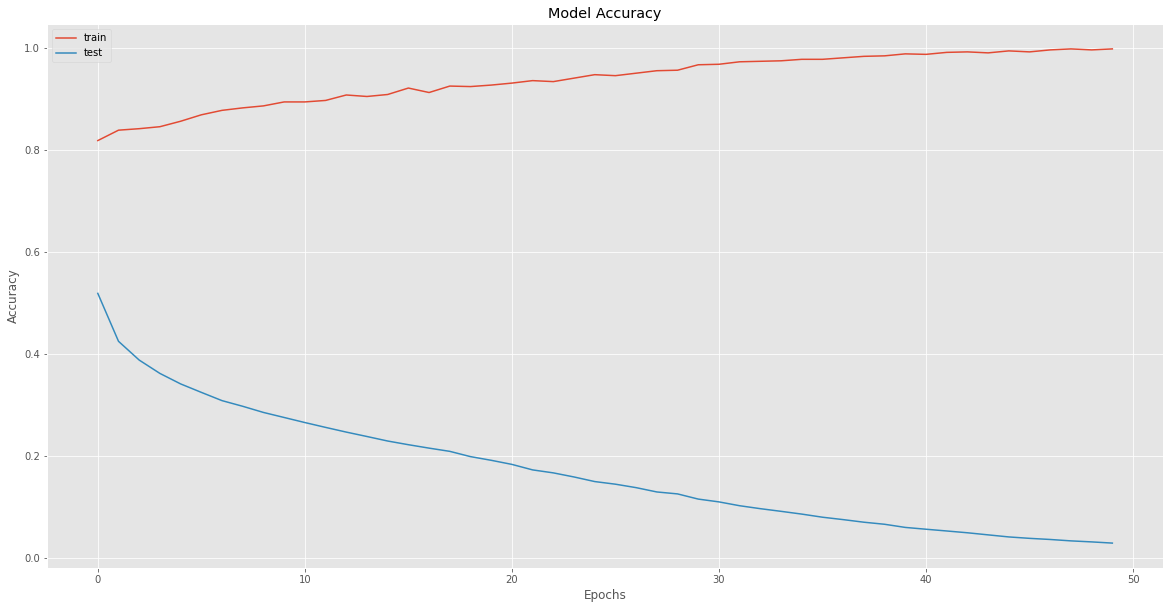

In [22]:
plt.plot(ann.history['accuracy'])
plt.plot(ann.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [23]:
pred=model.predict(X_test)
pred_digits=np.argmax(pred,axis=1)
y_train_ad = np.argmax(Y_train, axis=1)
print(classification_report(Y_test, pred.round()))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       370
           1       0.47      0.38      0.42        71

   micro avg       0.83      0.84      0.83       441
   macro avg       0.68      0.65      0.66       441
weighted avg       0.82      0.84      0.83       441
 samples avg       0.83      0.84      0.83       441



In [24]:
df.drop(['Attrition'], axis=1, inplace=True)

In [25]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

In [26]:
pca.explained_variance_ratio_

array([0.69131838, 0.30151649])

In [27]:
principalDf

,PC1,PC2
0,5139.144002,-718.086191
1,10528.865129,-1802.653430
2,-12089.425921,-3920.145490
3,8689.622047,-3949.517598
4,2192.360869,-3125.191133
...,...,...
1465,-2181.024559,-3848.070666
1466,7281.771483,3191.212196
1467,-9143.942850,9.825089
1468,-1113.966963,-1070.216317


In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(principalDf)
    Sum_of_squared_distances.append(km.inertia_)

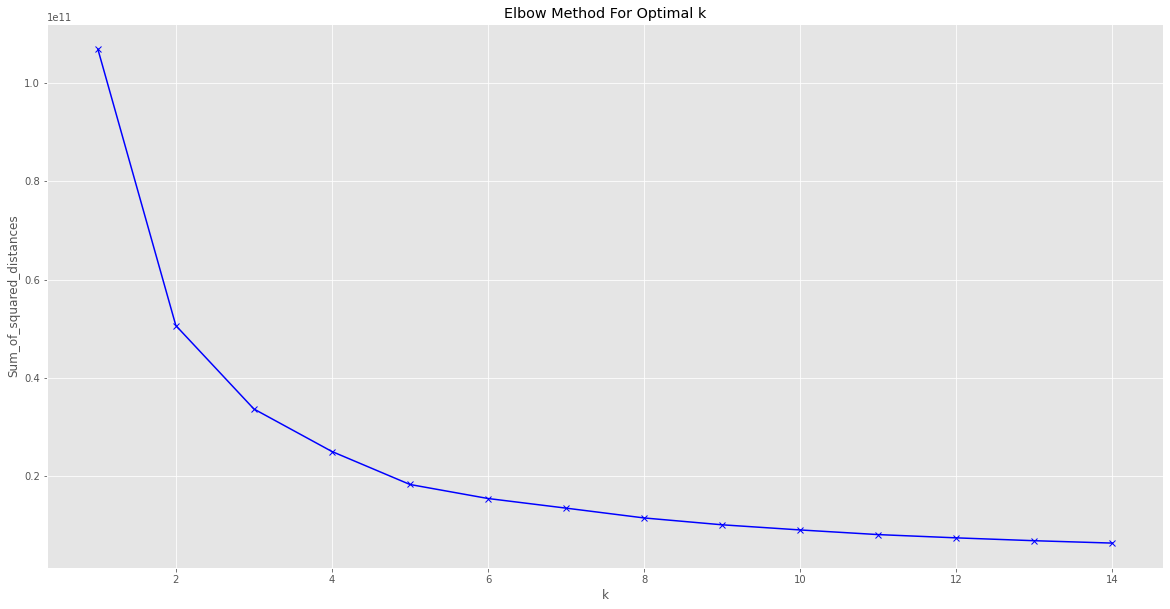

In [29]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [30]:
cluster_df = principalDf
predications = helper
kmeans_1 = KMeans(n_clusters=5,random_state= 10)
# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(cluster_df)
# Calculate cluster validation metrics
score_kemans_s = silhouette_score(cluster_df, kmeans_1.labels_, metric='euclidean')
score_kemans_c = calinski_harabasz_score(cluster_df, kmeans_1.labels_)
score_kemans_d = davies_bouldin_score(cluster_df, predictions)
print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)

Silhouette Score: 0.4394
Calinski Harabasz Score: 1781.0069
Davies Bouldin Score: 0.7229


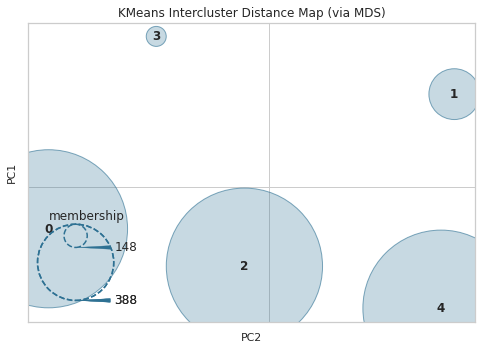

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [31]:
# Inter cluster distance map
from yellowbrick.cluster import InterclusterDistance
# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(kmeans_1)
visualizer.fit(cluster_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

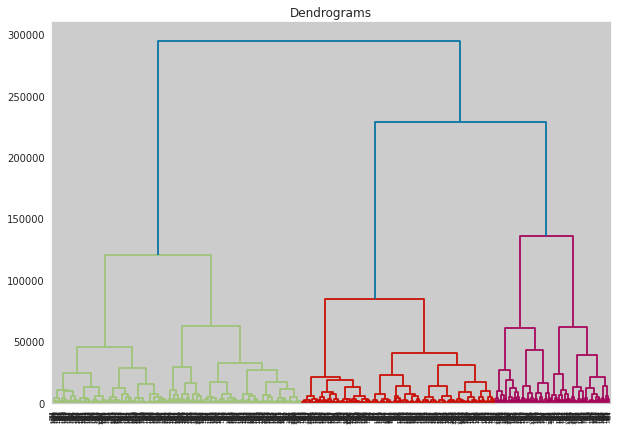

In [32]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(cluster_df, method='ward'))

In [33]:
# Agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define the model
model = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
yhat = model.fit(cluster_df)
yhat_2 = model.fit_predict(cluster_df)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation metrics
score_AGclustering_s = silhouette_score(cluster_df, yhat.labels_, metric='euclidean')
score_AGclustering_c = calinski_harabasz_score(cluster_df, yhat.labels_)
score_AGclustering_d = davies_bouldin_score(cluster_df, yhat_2)
print('Silhouette Score: %.4f' % score_AGclustering_s)
print('Calinski Harabasz Score: %.4f' % score_AGclustering_c)
print('Davies Bouldin Score: %.4f' % score_AGclustering_d)

Silhouette Score: 0.3904
Calinski Harabasz Score: 1510.2330
Davies Bouldin Score: 0.8567


981.6644868048068


<Figure size 360x360 with 0 Axes>

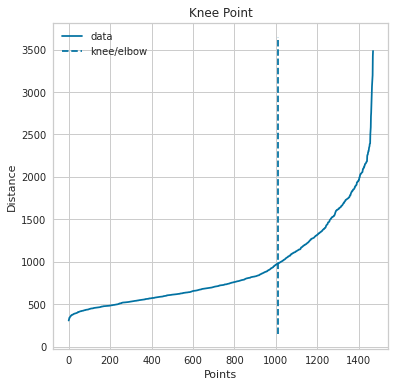

In [34]:
!pip install -q kneed
!pip install -q --trusted-host=pypi.org --trusted-host=files.pythonhosted.org --user kneed
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(cluster_df)
distances, indices = neighbors.kneighbors(cluster_df)
distances = np.sort(distances[:,10], axis=0)
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
print(distances[knee.knee])
pass;

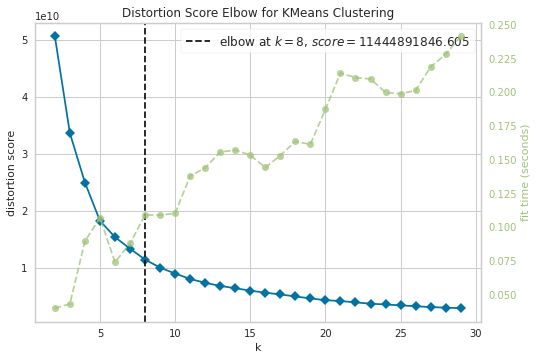

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
!pip install -q --trusted-host=pypi.org --trusted-host=files.pythonhosted.org --user kneed
from sklearn.cluster import KMeans
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state =10)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(cluster_df)        # Fit the data to the visualizer
visualizer.show()   

In [49]:
from numpy import unique
from numpy import where
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset
# define the model
model = DBSCAN(eps=981.6644868048068, min_samples= 18)
# rule of thumb for min_samples: 2*len(cluster_df.columns)
# fit model and predict clusters
yhat = model.fit_predict(cluster_df)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation metrics
score_dbsacn_s = silhouette_score(cluster_df, yhat, metric='euclidean')
score_dbsacn_c = calinski_harabasz_score(cluster_df, yhat)
score_dbsacn_d = davies_bouldin_score(cluster_df, yhat)
print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)

Silhouette Score: 0.2670
Calinski Harabasz Score: 376.3540
Davies Bouldin Score: 1.6981


4